In [2]:
# Set up packages for lecture. Don't worry about understanding this code, but
# make sure to run it if you're following along.
import numpy as np
import babypandas as bpd
import pandas as pd
from matplotlib_inline.backend_inline import set_matplotlib_formats
%reload_ext pandas_tutor
%set_pandas_tutor_options {'projectorMode': True}
set_matplotlib_formats("svg")

np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option("display.max_rows", 7)
pd.set_option("display.max_columns", 8)
pd.set_option("precision", 2)

# Lecture 6 –  More Querying and GroupBy

## DSC 10, Summer 2022

### Announcements

- Lab 2 is due **tomorrow at 11:59pm**.
- Homework 2 is due on **Sat 7/16 at 11:59pm**.

### Agenda

- Recap: queries.
- Writing queries with multiple conditions.
- GroupBy.
- Challenge problems.

**Resources**: 
- [Resources tab of the course website](https://dsc10.com/resources/)
- [DSC 10 Reference Sheet](https://drive.google.com/file/d/1mQApk9Ovdi-QVqMgnNcq5dZcWucUKoG-/view)
- [BabyPandas Documentation](https://babypandas.readthedocs.io/en/latest/index.html)

## Recap: queries

### Recap: queries

- A "query" is code that extracts rows from a table for which certain condition(s) are true.
- Below we load in our NBA salaries 🏀 dataset from last time.

In [3]:
salaries = bpd.read_csv('data/nba-2022.csv').set_index('Player')
salaries

,Position,Team,Salary
Player,,,
John Collins,PF,Atlanta Hawks,23000000
Danilo Gallinari,PF,Atlanta Hawks,20475000
Bogdan Bogdanović,SG,Atlanta Hawks,18000000
...,...,...,...
Raul Neto,PG,Washington Wizards,2089448
Daniel Gafford,C,Washington Wizards,1782621
Anthony Gill,PF,Washington Wizards,1517981


### Question: Who is the highest-paid player on the Houston Rockets? 🚀

In [4]:
%%pt
salaries.get('Team') == 'Houston Rockets'

In [5]:
%%pt
rockets = salaries[salaries.get('Team') == 'Houston Rockets']

In [6]:
rockets.sort_values(by='Salary', ascending=False).index[0]

'Eric Gordon'

### Boolean indexing

To select only some rows of `salaries`:

1. Make a sequence (list/array/Series) of `True`s (keep) and `False`s (toss).
    - The values `True` and `False` are of the _Boolean_ data type.
2. Then pass it into `salaries[sequence_goes_here]`.

Rather than making the sequence by hand, we usually generate it by making a comparison.

### Elementwise comparisons

There are several types of comparisons we can make.

|symbol|meaning|
|--------|--------|
|`==` |equal to |
|`!=` |not equal to |
|`<`|less than|
|`<=`|less than or equal to|
|`>`|greater than|
|`>=`|greater than or equal to|

In [7]:
%%pt
# Find all players whose salary is at least 20 million
salaries[salaries.get('Salary') > 20000000]

## Queries with multiple conditions

### Multiple conditions

- To do a query with multiple conditions, use `&` for "and" and `|` for "or".
- **Must use parentheses around each query.**
- Note: Don't use the Python keywords `and` and `or` here! They do not behave as you'd want.
    - Read the course notes for an explanation.

In [8]:
%%pt
# Find all players who are guards (point guards or shooting guards)
salaries[(salaries.get('Position') == 'PG') | (salaries.get('Position') == 'SG')]

In [9]:
# You can add line breaks within brackets
salaries[(salaries.get('Position') == 'PG') |
         (salaries.get('Position') == 'SG')]

,Position,Team,Salary
Player,,,
Bogdan Bogdanović,SG,Atlanta Hawks,18000000
Delon Wright,SG,Atlanta Hawks,8526316
Trae Young,PG,Atlanta Hawks,8326471
...,...,...,...
Kentavious Caldwell-Pope,SG,Washington Wizards,13038862
Aaron Holiday,PG,Washington Wizards,3980551
Raul Neto,PG,Washington Wizards,2089448


### The `&` and `|` operators work element-wise

In [10]:
%%pt
(salaries.get('Position') == 'PG')

In [11]:
%%pt
(salaries.get('Position') == 'SG')

In [12]:
%%pt
(salaries.get('Position') == 'PG') | (salaries.get('Position') == 'SG')

### Question: Which Power Forwards (PF) on the Sacramento Kings have a salary of over 8 million? 👑

In [13]:
%%pt
salaries[(salaries.get('Position') == 'PF') & 
         (salaries.get('Team') == 'Sacramento Kings') & 
         (salaries.get('Salary') > 8000000)]

<div class="menti">
<div>

### Discussion Question

Which query creates a DataFrame of all the centers (C) **besides** Dwight Howard?
Assume that `dwight = 'Dwight Howard'`.

A. `salaries[(salaries.get('Position') == 'C') &
            (salaries.get('Player') != dwight)]`

B. `salaries[(salaries.get('Position') == 'C') and
            (salaries.index != dwight)]`

C. `salaries[(salaries.get('Position') == 'C') &
            (salaries.index != dwight)]`

</div>
<div>

### To answer, go to **[menti.com](https://www.menti.com/v42ge81t5d)** and enter the code 2863 3386 or use this QR code:

![](images/menti-qr.png)
    
</div>
</div>



## GroupBy: Split, Aggregate, Combine

### Question: Which team had the highest payroll?

- We can find the payroll for any one team.
    - For example, `salaries[salaries.get('Team') == 'Golden State Warriors'].get('Salary').sum()`.
- But how can we find the payroll for **all** teams at once?

In [14]:
salaries

,Position,Team,Salary
Player,,,
John Collins,PF,Atlanta Hawks,23000000
Danilo Gallinari,PF,Atlanta Hawks,20475000
Bogdan Bogdanović,SG,Atlanta Hawks,18000000
...,...,...,...
Raul Neto,PG,Washington Wizards,2089448
Daniel Gafford,C,Washington Wizards,1782621
Anthony Gill,PF,Washington Wizards,1517981


In [15]:
salaries[salaries.get('Team') == 'Golden State Warriors'].get('Salary').sum()

130428103

In [16]:
salaries[salaries.get('Team') == 'Los Angeles Lakers'].get('Salary').sum()

145935865

In [17]:
salaries[salaries.get('Team') == 'Brooklyn Nets'].get('Salary').sum()

112909659

It seems like there has to be a better way. And there is!

### `.groupby`

Observe what happens when we use the `.groupby` method on `salaries` with the argument `'Team'`:

In [18]:
salaries.groupby('Team').sum()

,Salary
Team,
Atlanta Hawks,115294102
Boston Celtics,137270099
Brooklyn Nets,112909659
...,...
Toronto Raptors,111121285
Utah Jazz,149246365
Washington Wizards,120851830


### An Illustrative Example: Pets 🐱 🐶🐹

Consider the DataFrame `pets` containing pet species, colors, and weights.

<div align=center>
<img src='images/pets.png' width=200>
</div>

📢 Shoutout to Kodah, Chilli, Fluffles, and Max.

In [19]:
pets = bpd.DataFrame().assign(
    Species=['dog', 'cat', 'cat', 'dog', 'dog', 'hamster'],
    Color=['black', 'golden', 'black', 'white', 'golden', 'golden'],
    Weight=[40, 15, 20, 80, 25, 1]
)

pets

,Species,Color,Weight
0,dog,black,40
1,cat,golden,15
2,cat,black,20
3,dog,white,80
4,dog,golden,25
5,hamster,golden,1


### Visualizing `pets.groupby('Species').mean()`

- 3 steps for `.groupby`
    1. Split
    2. Aggregate
    3. Combine

In [20]:
%%pt

pets.groupby('Species').mean()

### Back to the NBA... 🏀

In [21]:
%%pt
salaries.groupby('Team').sum()

### `.groupby` in general

1. Use `.groupby(column_name)` to gather rows which have the same value in the specified column (`column_name`).
    - In the previous example, we grouped by `'Team'`.
    - In the resulting DataFrame, there will be one row for every unique value of `'Team'`.
2. Apply an **aggregation** method **within** each group.
    - In the previous example, we applied the `sum` method to every `'Team'`.
    - The aggregation method is applied individually to each column.

Some aggregation methods: `.count()`, `.sum()`, `.mean()`, `.median()`, `.max()`, `.min()`.

### Observation #1

- The index has changed to team names.
- In general, the new row labels are the *group labels* (the thing that is used to determine if two rows were in same group).

In [22]:
salaries

,Position,Team,Salary
Player,,,
John Collins,PF,Atlanta Hawks,23000000
Danilo Gallinari,PF,Atlanta Hawks,20475000
Bogdan Bogdanović,SG,Atlanta Hawks,18000000
...,...,...,...
Raul Neto,PG,Washington Wizards,2089448
Daniel Gafford,C,Washington Wizards,1782621
Anthony Gill,PF,Washington Wizards,1517981


In [23]:
salaries.groupby('Team').sum()

,Salary
Team,
Atlanta Hawks,115294102
Boston Celtics,137270099
Brooklyn Nets,112909659
...,...
Toronto Raptors,111121285
Utah Jazz,149246365
Washington Wizards,120851830


### Observation #2

- The `'Position'` and `'Team'` columns have disappeared. Why?

In [24]:
salaries.groupby('Team').sum()

,Salary
Team,
Atlanta Hawks,115294102
Boston Celtics,137270099
Brooklyn Nets,112909659
...,...
Toronto Raptors,111121285
Utah Jazz,149246365
Washington Wizards,120851830


### Disappearing columns ✨🐇🎩  

- The aggregation method is applied to each column.
- If it doesn't make sense to apply it to a particular column, that column will disappear.
- Example: We can't sum strings, like in the `'Position'` column.
- Surprising example: we *can* `max()` strings. How?

In [25]:
%%pt
salaries.groupby('Team').max() # Can you guess how the max position is determined?

### Other aggregation methods

- Aggregation methods work on arrays/lists/Series and return a single number.
- The most common ones are `.count()`, `.sum()`, `.mean()`, `.median()`, `.max()`, and `.min()`.


In [26]:
salaries.groupby('Team').count()

,Position,Salary
Team,,
Atlanta Hawks,11,11
Boston Celtics,13,13
Brooklyn Nets,11,11
...,...,...
Toronto Raptors,11,11
Utah Jazz,11,11
Washington Wizards,12,12


In [27]:
salaries.groupby('Team').mean()

,Salary
Team,
Atlanta Hawks,1.05e+07
Boston Celtics,1.06e+07
Brooklyn Nets,1.03e+07
...,...
Toronto Raptors,1.01e+07
Utah Jazz,1.36e+07
Washington Wizards,1.01e+07


### Question: Which team had the highest payroll? 

In [28]:
%%pt
salaries.groupby('Team').sum().sort_values(by='Salary', ascending=False).index[0]

### Question: How many players play each position?

In [29]:
%%pt
salaries.groupby('Position').count()

### Aside: Better column names?

To rename a column:

1. Add a new column with `.assign` containing the same values as the old column(s).
2. Drop the old column(s) with `.drop(columns=list_of_column_labels)`.

In [30]:
position_counts = salaries.groupby('Position').count()
position_counts

,Team,Salary
Position,,
C,77,77
PF,73,73
PG,71,71
SF,72,72
SG,88,88


In [31]:
%%pt
position_counts.assign(Count=position_counts.get('Team')).drop(columns=['Team', 'Salary'])

## Example: IMDb Dataset 🎞️

<center>
<img width=80% src="images/imdb.png"/>
</center>

In [32]:
imdb = bpd.read_csv('data/imdb.csv').set_index('Title').sort_values(by='Rating')
imdb

,Votes,Rating,Year,Decade
Title,,,,
Akira,91652,8.0,1988,1980
Per un pugno di dollari,124671,8.0,1964,1960
Guardians of the Galaxy,527349,8.0,2014,2010
...,...,...,...,...
The Godfather: Part II,692753,9.0,1974,1970
The Shawshank Redemption,1498733,9.2,1994,1990
The Godfather,1027398,9.2,1972,1970


### Question: How many movies appear from each decade?

In [33]:
imdb.groupby('Decade').count()

,Votes,Rating,Year
Decade,,,
1920,4,4,4
1930,7,7,7
1940,14,14,14
...,...,...,...
1990,42,42,42
2000,50,50,50
2010,29,29,29


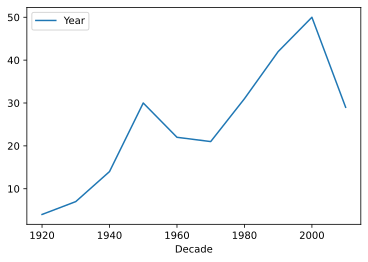

In [34]:
imdb.groupby('Decade').count().plot(y='Year');

### Question: What was the highest rated movie of the 1990's?

Let's try and do this two different ways.

#### Without grouping

In [35]:
%%pt
imdb[imdb.get('Decade') == 1990].sort_values('Rating', ascending=False).index[0]

#### With grouping

In [36]:
%%pt
imdb.reset_index().groupby('Decade').max()

- It turns out that this method **does not** yield the correct answer. 
- When we use an aggregation function (e.g. `.max`), aggregation is done to each column individually. 
- While it's true that the highest rated movie from the 1990s has a rating of 9.2, that movie is **not** Unforgiven – instead, Unforgiven is the movie that's the latest in the alphabet among all movies from the 1990s.
- Taking the max is not helpful here.

## Challenge Problems

We won't cover these problems in class, but they're here for you to practice with some harder examples. To access the solutions, you'll need to watch [this solution walkthrough video](https://youtu.be/xg7rnjWnZ48).

Before accessing the solutions, **make sure to try these problems on your own** – they're great prep for homeworks and projects!

### Question: How many years have more than 3 movies rated above 8.5?

#### Aside: Using `.sum()` on a boolean array

- Summing a boolean array gives a count of the number of `True` elements because Python treats `True` as 1 and `False` as 0. 
- Can you use that fact here?

### Question: Out of the years with more than 3 movies, which had the highest average rating?

### Question: Which year had the longest movie titles, on average?

**Hint:** Use `.str.len()` on the column or index that contains the names of the movies.

### Question: What is the average rating of movies from years that had at least 3 movies in the Top 250?

## Summary

### Summary

- We can write queries that involve multiple conditions, as long as we:
    - Put parentheses around all conditions.
    - Separate conditions using `&` if you require all to be true, or `|` if you require at least one to be true.
- The method call `df.groupby(column_name).name_of_method()` **aggregates** all rows with the same value for `column_name` into a single row in the resulting table, according to the aggregation method `name_of_method`.
    - Aggregation methods we've seen include `.count()`, `.sum()`, `.mean()`, `.median()`, `.max()`, and `.min()`.
- **Next time:** A picture is worth a 1000 words – it's time to visualize!